In [138]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

In [5]:
with pd.HDFStore("2023-07-22/2023-07-22_sendage.h5") as hdf:
    print(hdf.keys())

['/ascents', '/boulders', '/climbers', '/climbs']


In [54]:
ascents = pd.read_hdf("2023-07-22/2023-07-22_sendage.h5", key="ascents")
boulders = pd.read_hdf("2023-07-22/2023-07-22_sendage.h5", key="boulders")
climbs = pd.read_hdf("2023-07-22/2023-07-22_sendage.h5", key="climbs")
climbers = pd.read_hdf("2023-07-22/2023-07-22_sendage.h5", key="climbers")

In [94]:
for i in range(18):
    climbs.loc[climbs['grade']==f'V{i} ↑ \\n\\t\\t\\t\\t\\t\\t+', 'grade'] = f'V{i}+'
    climbs.loc[climbs['grade']==f'V{i} \\n\\t\\t\\t\\t\\t\\t', 'grade'] = f'V{i}'
    climbs.loc[climbs['grade']==f'V{i} \\n\\t\\t\\t\\t\\t\\t\\t', 'grade'] = f'V{i}'
    climbs.loc[climbs['grade']==f'V{i} ↓ \\n\\t\\t\\t\\t\\t\\t\\t-', 'grade'] = f'V{i}-'
    climbs.loc[climbs['grade']==f'V{i} ↓ \\n\\t\\t\\t\\t\\t\\t-', 'grade'] = f'V{i}'

In [131]:
climbers.head()

,id,# sends,connected,b_connected,# boulders
name,,,,,
aaron,0,29,True,True,29
aaron-eden,1,4,True,True,4
aaron-guiles,2,7,True,True,7
aaron-martinez,3,54,True,True,54
aaron-miller,4,39,True,False,0


In [130]:
num_b_ascents = ascents[climbs.loc[ascents['climb_id'], 'type'].values=='boulder'].groupby('user')['climb_id'].count()
climbers['# boulders'] = 0
climbers.loc[num_b_ascents.index, '# boulders'] = num_b_ascents.values

In [9]:
ascents.head()

,climb_id,user,date,grade,style,first-ascent,stars,comments,beta
0,36512,simon-fugere,2023-07-04,V4,flash,False,NaN,,
1,36512,max-b,2023-06-23,V4+,redpoint,False,3.0,,
2,36512,davidnguyen,2023-06-20,V4,redpoint,False,4.0,,
3,36512,calumtustinmayes,2023-06-13,V4,redpoint,False,3.0,,
4,36512,vincentz,2023-06-03,V4+,redpoint,False,4.0,Fun Warm-up,


In [10]:
boulders.head()

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,...,areas_10_name,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected
36512,superfly-superfly-grand-wall-boulders-squamish...,Superfly,8353,boulder,29,0,NaN,V4,A Squamish all-time classic with physical move...,22,...,NaN,NaN,NaN,NaN,2.0,5.0,4.153017,464.0,240.0,True
36410,easy-in-easy-chair-easy-chair-grand-wall-bould...,Easy In An Easy Chair,7521,boulder,29,0,NaN,V4,Traverse left to right on good slopers. A clas...,27,...,NaN,NaN,NaN,NaN,1.0,5.0,4.072016,486.0,213.0,True
36476,titanic-titanic-north-grand-wall-boulders-squa...,Titanic,8360,boulder,24,0,NaN,V3+,Start standing with opposing edges for your ha...,58,...,NaN,NaN,NaN,NaN,1.0,5.0,3.935268,448.0,242.0,True
35610,trad-killer-heartbreak-hotel-grand-wall-boulde...,Trad Killer,8351,boulder,28,0,NaN,V4,,38,...,NaN,NaN,NaN,NaN,1.0,5.0,4.171285,397.0,189.0,True
3049,timeless-titanic-south-grand-wall-boulders-squ...,Timeless,8361,boulder,32,0,NaN,V5-,Start matched on the big shelf and climb up an...,22,...,NaN,NaN,NaN,NaN,2.0,5.0,4.162907,399.0,156.0,True


In [19]:
climbs.head()

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,...,areas_10_name,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected
36512,superfly-superfly-grand-wall-boulders-squamish...,Superfly,8353,boulder,29,0,NaN,V4,A Squamish all-time classic with physical move...,22,...,NaN,NaN,NaN,NaN,2.0,5.0,4.153017,464.0,240.0,True
36410,easy-in-easy-chair-easy-chair-grand-wall-bould...,Easy In An Easy Chair,7521,boulder,29,0,NaN,V4,Traverse left to right on good slopers. A clas...,27,...,NaN,NaN,NaN,NaN,1.0,5.0,4.072016,486.0,213.0,True
36476,titanic-titanic-north-grand-wall-boulders-squa...,Titanic,8360,boulder,24,0,NaN,V3+,Start standing with opposing edges for your ha...,58,...,NaN,NaN,NaN,NaN,1.0,5.0,3.935268,448.0,242.0,True
35610,trad-killer-heartbreak-hotel-grand-wall-boulde...,Trad Killer,8351,boulder,28,0,NaN,V4,,38,...,NaN,NaN,NaN,NaN,1.0,5.0,4.171285,397.0,189.0,True
3049,timeless-titanic-south-grand-wall-boulders-squ...,Timeless,8361,boulder,32,0,NaN,V5-,Start matched on the big shelf and climb up an...,22,...,NaN,NaN,NaN,NaN,2.0,5.0,4.162907,399.0,156.0,True


In [132]:
climbers.sort_values(by='# boulders', ascending=False).head(10)

,id,# sends,connected,b_connected,# boulders
name,,,,,
graham-mcgrenere,1015,3473,True,True,2380
anonymous,224,2974,True,True,2343
keith-chan,1523,2136,True,True,1989
greg-bauch,1020,1918,True,True,1918
brett-kruselnicki,403,1907,True,True,1906
tiannabaker,2627,1472,True,True,1472
christopher-james-carter,562,1450,True,True,1448
seanathon-morphy,2422,1995,True,True,1417
trevor-edwards,2675,1373,True,True,1373


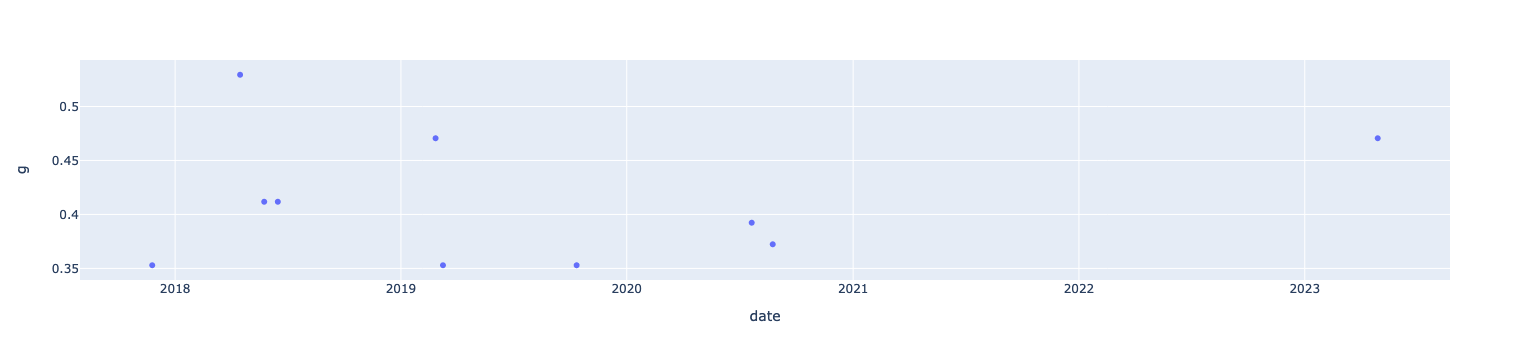

In [169]:
gvsdate = ascents[(ascents['user']=='paulk') & (~ascents['date'].isna())].sort_values(by='date')
gvsdate['YYYY-MM'] = gvsdate['date'].dt.to_period("M")
px.scatter(data_frame=gvsdate.groupby('YYYY-MM')[['date', 'g']].max(), x='date', y='g')

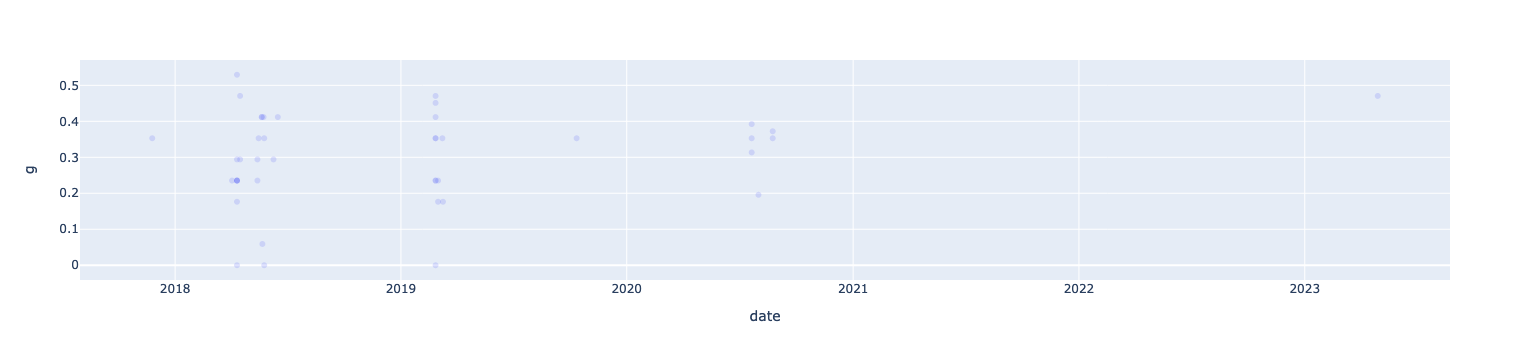

In [170]:
px.scatter(data_frame=ascents[(ascents['user']=='paulk') & (~ascents['date'].isna())].sort_values(by='date'),
          x='date', y='g', opacity=0.2)

In [133]:
climbers.loc['larathompson']

id             1632
# sends         150
connected      True
b_connected    True
# boulders      124
Name: larathompson, dtype: object

In [101]:
grades = pd.DataFrame( 
    #"boulder"        
    [{"id":"10","grade":"V0"},{"id":"14","grade":"V1"},{"id":"18","grade":"V2"},{"id":"22","grade":"V3"},
              {"id":"28","grade":"V4"},{"id":"34","grade":"V5"},{"id":"40","grade":"V6"},{"id":"44","grade":"V7"},
              {"id":"48","grade":"V8"},{"id":"54","grade":"V9"},{"id":"59","grade":"V10"},{"id":"64","grade":"V11"},
              {"id":"69","grade":"V12"},{"id":"74","grade":"V13"},{"id":"79","grade":"V14"},{"id":"84","grade":"V15"},
              {"id":"89","grade":"V16"},{"id":"94","grade":"V17"},
    #"sport"
     {"id":"1","grade":"5.1"},{"id":"2","grade":"5.2"},{"id":"3","grade":"5.3"},{"id":"4","grade":"5.4"},
            {"id":"5","grade":"5.5"},{"id":"6","grade":"5.6"},{"id":"7","grade":"5.7"},{"id":"12","grade":"5.8"},
            {"id":"22","grade":"5.9"},{"id":"27","grade":"5.10a"},{"id":"32","grade":"5.10b"},{"id":"37","grade":"5.10c"},
            {"id":"42","grade":"5.10d"},{"id":"47","grade":"5.11a"},{"id":"51","grade":"5.11b"},{"id":"53","grade":"5.11c"},
            {"id":"57","grade":"5.11d"},{"id":"62","grade":"5.12a"},{"id":"67","grade":"5.12b"},{"id":"72","grade":"5.12c"},
            {"id":"77","grade":"5.12d"},{"id":"82","grade":"5.13a"},{"id":"87","grade":"5.13b"},{"id":"92","grade":"5.13c"},
            {"id":"97","grade":"5.13d"},{"id":"102","grade":"5.14a"},{"id":"107","grade":"5.14b"},{"id":"112","grade":"5.14c"},
            {"id":"117","grade":"5.14d"},{"id":"122","grade":"5.15a"},{"id":"127","grade":"5.15b"},{"id":"132","grade":"5.15c"},
            {"id":"137","grade":"5.15d"},])
grades.loc[:17, 'type']='boulder'
grades.loc[18:50, 'type']='sport'
grades.loc[:50, 'a'] = np.concatenate([np.arange(18), np.arange(33)])
g_boulder = lambda a: a/17
g_inv_boulder = lambda g: 17*g
grades.loc[:17, 'g'] = g_boulder(grades.loc[:17, 'a'])
g_sport = lambda a: (np.exp(a/12)-1)/(np.exp(32/12)-1)
g_inv_sport = lambda g: 12*np.log((np.exp(32/12)-1)*g+1)
grades.loc[18:50, 'g'] = g_sport(grades.loc[18:50, 'a'])

g_transforms = {'bouder': g_boulder, 
                'sport': g_sport}
grades = grades.set_index(['type', 'grade'])

def grade_num(type_s, grade_str_s):
    neg = grade_str_s.str.contains('-')
    pos = grade_str_s.str.contains('\+')
    grade_str_s[neg|pos] = grade_str_s[neg|pos].str[:-1]
    
    bs = (type_s == 'boulder').values
    ss = np.isin(type_s, ['sport', 'trad'])
    g = np.zeros(len(grade_str_s))
    g[bs] = g_boulder(grades.loc['boulder'].loc[grade_str_s[bs], 'a'].values + 0.33*(pos[bs].astype(int) - neg[bs].astype(int)))
    g[ss] = g_sport(grades.loc['sport'].loc[grade_str_s[ss], 'a'].values + 0.33*(pos[ss].astype(int) - neg[ss].astype(int)))
    return g

In [107]:
ascents['g']=grade_num(climbs.loc[ascents['climb_id'],'type'], ascents['grade'].copy())

In [109]:
g_mean = ascents.groupby('climb_id')['g'].mean()

In [118]:
boulders['g_mean'] = 0
boulders.loc[np.isin(boulders.index, g_mean.index), 'g_mean'] = 17*g_mean.loc[boulders.index[np.isin(boulders.index, g_mean.index)]]

In [119]:
boulders.head()

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,...,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected,g_mean
36512,superfly-superfly-grand-wall-boulders-squamish...,Superfly,8353,boulder,29,0,NaN,V4,A Squamish all-time classic with physical move...,22,...,NaN,NaN,NaN,2.0,5.0,4.153017,464.0,240.0,True,4.011293
36410,easy-in-easy-chair-easy-chair-grand-wall-bould...,Easy In An Easy Chair,7521,boulder,29,0,NaN,V4,Traverse left to right on good slopers. A clas...,27,...,NaN,NaN,NaN,1.0,5.0,4.072016,486.0,213.0,True,4.011373
36476,titanic-titanic-north-grand-wall-boulders-squa...,Titanic,8360,boulder,24,0,NaN,V3+,Start standing with opposing edges for your ha...,58,...,NaN,NaN,NaN,1.0,5.0,3.935268,448.0,242.0,True,3.014435
35610,trad-killer-heartbreak-hotel-grand-wall-boulde...,Trad Killer,8351,boulder,28,0,NaN,V4,,38,...,NaN,NaN,NaN,1.0,5.0,4.171285,397.0,189.0,True,3.965444
3049,timeless-titanic-south-grand-wall-boulders-squ...,Timeless,8361,boulder,32,0,NaN,V5-,Start matched on the big shelf and climb up an...,22,...,NaN,NaN,NaN,2.0,5.0,4.162907,399.0,156.0,True,4.841297
